In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import hashlib

In [14]:
directory = "caltech-101/101_ObjectCategories"
class_names = sorted([d for d in os.listdir(directory) if d != '.DS_Store'])
print('There are', len(class_names), 'classes')
print('First 5 classes:')
print(class_names[:5])

There are 101 classes
First 5 classes:
['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion']


total number of images:  8677


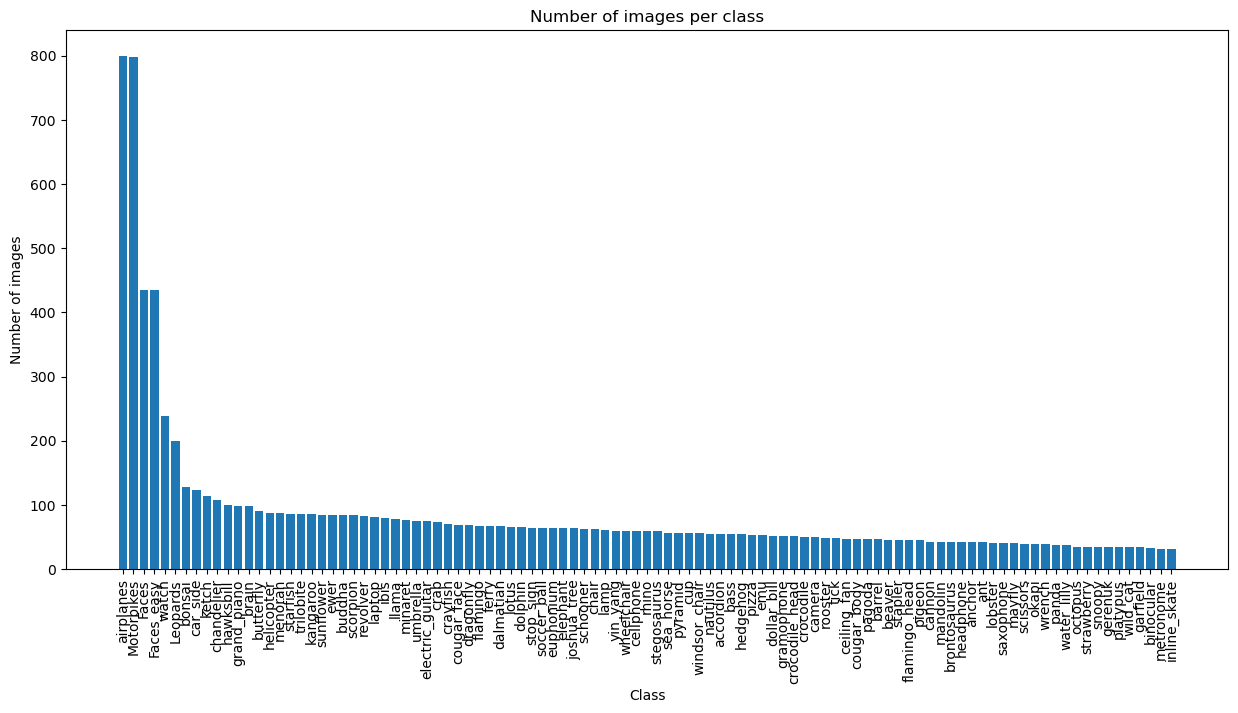

In [15]:
num_images = [len(os.listdir(os.path.join(directory, class_name))) for class_name in class_names]
sorted_indices = np.argsort(num_images)[::-1]
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_num_images = [num_images[i] for i in sorted_indices]

print("total number of images: ", sum(sorted_num_images))

plt.figure(figsize=(15, 7))
plt.bar(np.arange(len(sorted_class_names)), sorted_num_images)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.xticks(np.arange(len(sorted_class_names)), sorted_class_names, rotation=90)
plt.show()

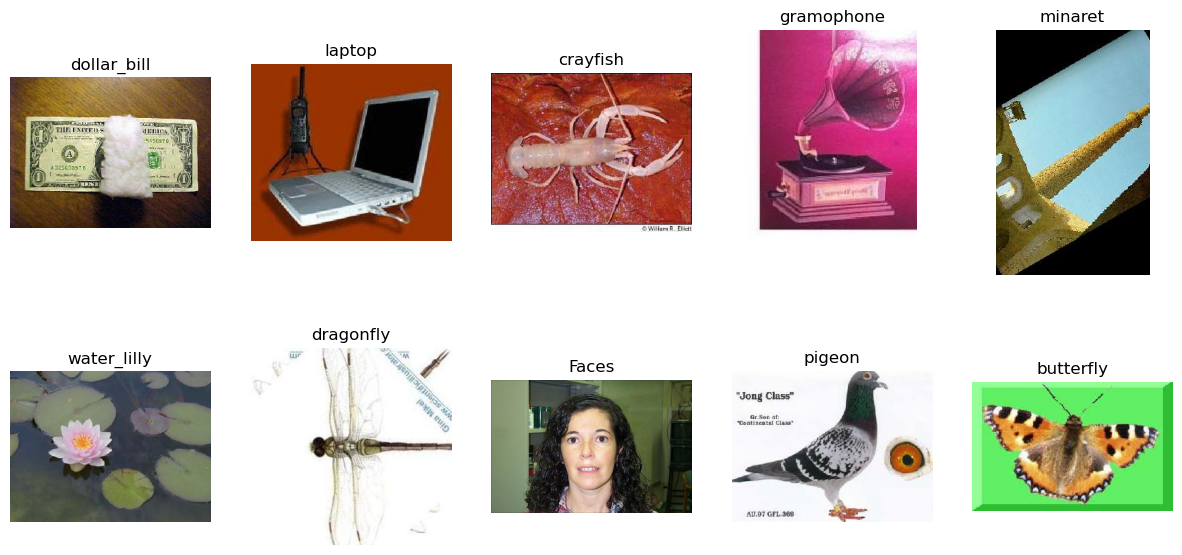

In [19]:
# show 10 random images from the dataset
plt.figure(figsize=(15, 7))
for i in range(10):
    class_name = np.random.choice(class_names)
    image_name = np.random.choice(os.listdir(os.path.join(directory, class_name)))
    image = plt.imread(os.path.join(directory, class_name, image_name))
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(class_name)

In [17]:
print('Mean number of images per class:', np.mean(num_images))
print('Min number of images per class:', np.min(num_images))
print('Max number of images per class:', np.max(num_images))

Mean number of images per class: 85.91089108910892
Min number of images per class: 31
Max number of images per class: 800


In [18]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()
    
hashes = {}
duplicates = []

for class_name in class_names:
    image_files = os.listdir(os.path.join(directory, class_name))
    for image_file in image_files:
        image_path = os.path.join(directory, class_name, image_file)
        h = file_hash(image_path)
        if h in hashes:
            duplicates.append((image_path, hashes[h]))
        else:
            hashes[h] = image_path
            
print('Number of duplicate images:', len(duplicates))

Number of duplicate images: 0
